In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Cleaning & Pre-processing Traffic data

In [3]:
df=pd.read_csv(r"F:\All downloads for Upgrad\Uber project\Dataset_Uber Traffic.csv")
df.head()

,DateTime,Junction,Vehicles,ID
0,01-11-2015 00:00,1,15,20151101001
1,01-11-2015 01:00,1,13,20151101011
2,01-11-2015 02:00,1,10,20151101021
3,01-11-2015 03:00,1,7,20151101031
4,01-11-2015 04:00,1,9,20151101041


In [4]:
df.shape

(48120, 4)

In [5]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [6]:
df.describe(include= 'object')

,DateTime
count,48120
unique,14592
top,30-06-2017 23:00
freq,4


In [7]:
# checking missing values
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [8]:
# Convert DateTime to proper datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [9]:
df.shape

(48120, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [11]:
# aggregate traffic volumes by hour and junction
df_agg = df.groupby(['DateTime', 'Junction'], as_index=False)['Vehicles'].sum()
df_agg

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 00:00:00,2,6
2,2015-11-01 00:00:00,3,9
3,2015-11-01 01:00:00,1,13
4,2015-11-01 01:00:00,2,6
...,...,...,...
48115,2017-06-30 22:00:00,4,22
48116,2017-06-30 23:00:00,1,78
48117,2017-06-30 23:00:00,2,27
48118,2017-06-30 23:00:00,3,39


In [12]:
# Standardize the Vehicles column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_agg['Vehicles_scaled'] = scaler.fit_transform(df_agg[['Vehicles']])

In [13]:
# Creation of time-based features
df_agg['hour'] = df_agg['DateTime'].dt.hour
df_agg['day_of_week'] = df_agg['DateTime'].dt.dayofweek
df_agg['month'] = df_agg['DateTime'].dt.month
df_agg['is_weekend'] = df_agg['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [14]:
df_agg

,DateTime,Junction,Vehicles,Vehicles_scaled,hour,day_of_week,month,is_weekend
0,2015-11-01 00:00:00,1,15,-0.375489,0,6,11,1
1,2015-11-01 00:00:00,2,6,-0.809227,0,6,11,1
2,2015-11-01 00:00:00,3,9,-0.664648,0,6,11,1
3,2015-11-01 01:00:00,1,13,-0.471875,1,6,11,1
4,2015-11-01 01:00:00,2,6,-0.809227,1,6,11,1
...,...,...,...,...,...,...,...,...
48115,2017-06-30 22:00:00,4,22,-0.038137,22,4,6,0
48116,2017-06-30 23:00:00,1,78,2.660678,23,4,6,0
48117,2017-06-30 23:00:00,2,27,0.202829,23,4,6,0
48118,2017-06-30 23:00:00,3,39,0.781146,23,4,6,0


In [15]:
# Generate laf features
df_agg.sort_values(['Junction', 'DateTime'], inplace=True)
for lag in [1, 2, 3]:
    df_agg[f'lag_{lag}'] = df_agg.groupby('Junction')['Vehicles'].shift(lag)

In [16]:
df_agg

,DateTime,Junction,Vehicles,Vehicles_scaled,hour,day_of_week,month,is_weekend,lag_1,lag_2,lag_3
0,2015-11-01 00:00:00,1,15,-0.375489,0,6,11,1,NaN,NaN,NaN
3,2015-11-01 01:00:00,1,13,-0.471875,1,6,11,1,15.0,NaN,NaN
6,2015-11-01 02:00:00,1,10,-0.616454,2,6,11,1,13.0,15.0,NaN
9,2015-11-01 03:00:00,1,7,-0.761034,3,6,11,1,10.0,13.0,15.0
12,2015-11-01 04:00:00,1,9,-0.664648,4,6,11,1,7.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...
48103,2017-06-30 19:00:00,4,11,-0.568261,19,4,6,0,17.0,16.0,16.0
48107,2017-06-30 20:00:00,4,30,0.347408,20,4,6,0,11.0,17.0,16.0
48111,2017-06-30 21:00:00,4,16,-0.327296,21,4,6,0,30.0,11.0,17.0
48115,2017-06-30 22:00:00,4,22,-0.038137,22,4,6,0,16.0,30.0,11.0


In [17]:
# Drop Rows with NaN (due to lags)
df_final = df_agg.dropna().reset_index(drop=True)

In [18]:
df_final

,DateTime,Junction,Vehicles,Vehicles_scaled,hour,day_of_week,month,is_weekend,lag_1,lag_2,lag_3
0,2015-11-01 03:00:00,1,7,-0.761034,3,6,11,1,10.0,13.0,15.0
1,2015-11-01 04:00:00,1,9,-0.664648,4,6,11,1,7.0,10.0,13.0
2,2015-11-01 05:00:00,1,6,-0.809227,5,6,11,1,9.0,7.0,10.0
3,2015-11-01 06:00:00,1,9,-0.664648,6,6,11,1,6.0,9.0,7.0
4,2015-11-01 07:00:00,1,8,-0.712841,7,6,11,1,9.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
48103,2017-06-30 19:00:00,4,11,-0.568261,19,4,6,0,17.0,16.0,16.0
48104,2017-06-30 20:00:00,4,30,0.347408,20,4,6,0,11.0,17.0,16.0
48105,2017-06-30 21:00:00,4,16,-0.327296,21,4,6,0,30.0,11.0,17.0
48106,2017-06-30 22:00:00,4,22,-0.038137,22,4,6,0,16.0,30.0,11.0


# 2. EDA

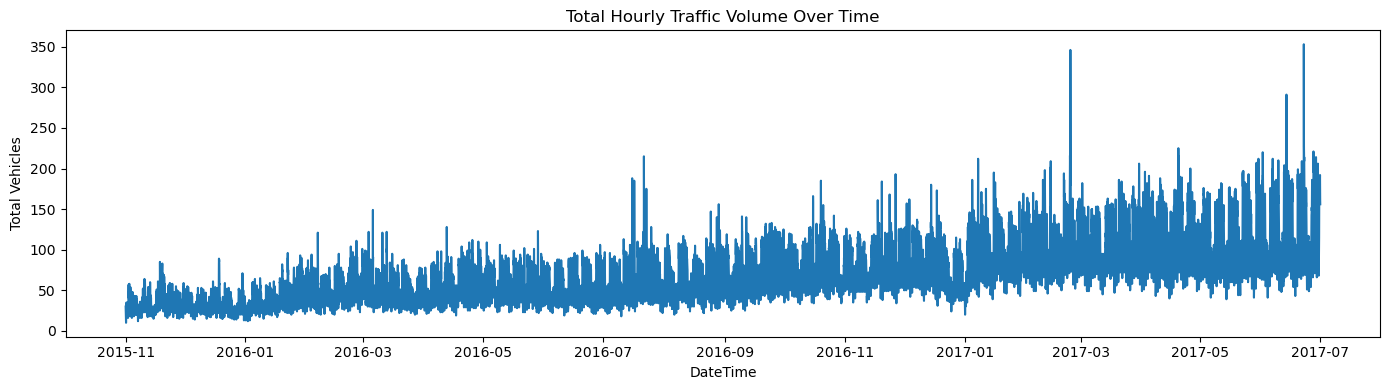

In [20]:
# Aggregate total traffic per hour (all junctions)
df_hourly = df_agg.groupby('DateTime')['Vehicles'].sum()

plt.figure(figsize=(14, 4))
plt.plot(df_hourly.index, df_hourly.values)
plt.title("Total Hourly Traffic Volume Over Time")
plt.xlabel("DateTime")
plt.ylabel("Total Vehicles")
plt.tight_layout()
plt.show()

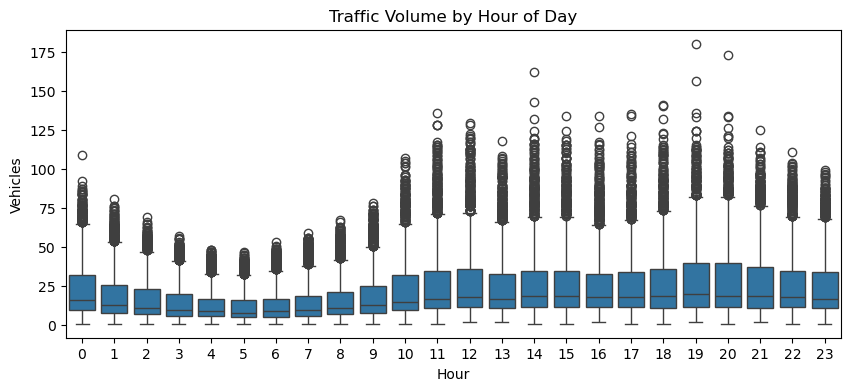

In [21]:
#  Traffic by Hour of the Day (Rush Hours)
plt.figure(figsize=(10, 4))
sns.boxplot(x='hour', y='Vehicles', data=df_agg)
plt.title("Traffic Volume by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Vehicles")
plt.show()

##### Traffic volume is lowest during late-night and early-morning hours (0–6 AM) and peaks steadily from late morning through evening (11 AM–8 PM), indicating high vehicle flow during work and commute hours.

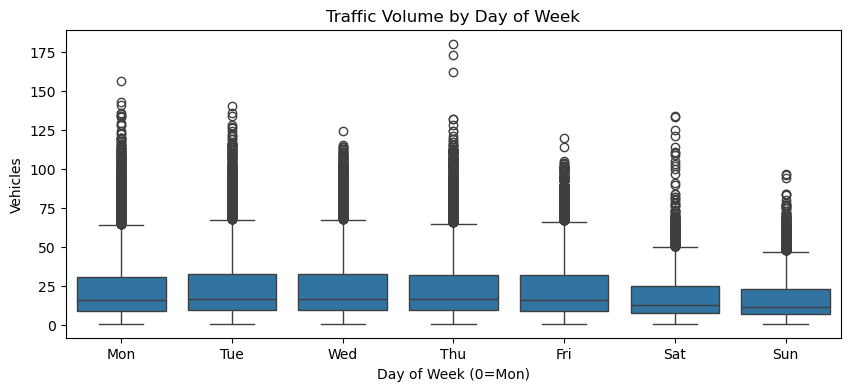

In [23]:
# Traffic by Day of the Week
plt.figure(figsize=(10, 4))
sns.boxplot(x='day_of_week', y='Vehicles', data=df_agg)
plt.title("Traffic Volume by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Vehicles")
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks=range(7), labels=day_labels)
plt.show()

##### Traffic volume is generally higher and more consistent on weekdays (Monday to Friday), while weekends (Saturday and Sunday) show a noticeable drop in median traffic and overall volume.

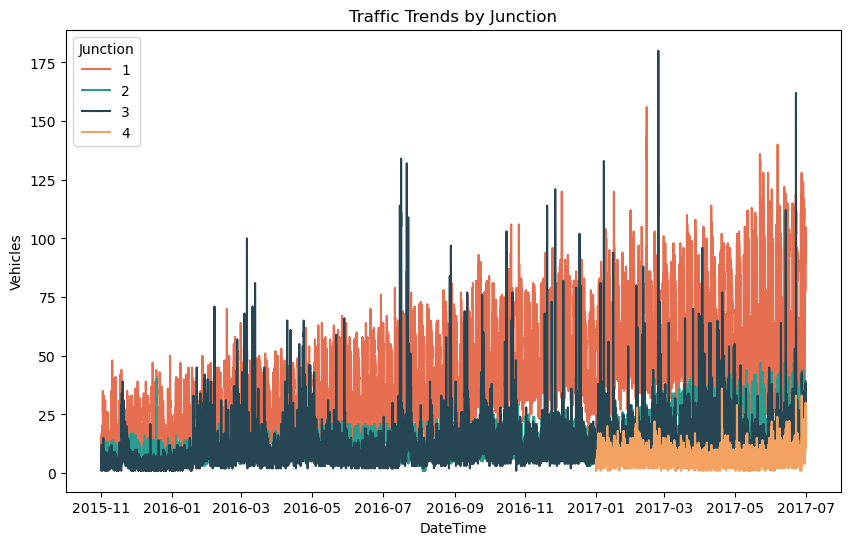

In [25]:
# Traffic Patterns per Junction 

# custom colors for each Junction
custom_palette = {
    1: '#E76F51',  # Red-Orange
    2: '#2A9D8F',  # Teal
    3: '#264653',  # Navy Blue
    4: '#F4A261'   # Light Orange
} 
plt.figure(figsize=(10, 6))
sns.lineplot(x='DateTime', y='Vehicles', hue='Junction', data=df_agg, palette=custom_palette)
plt.title("Traffic Trends by Junction")
plt.xlabel("DateTime")
plt.ylabel("Vehicles")
plt.legend(title='Junction')
plt.show()

##### Junction 1 consistently experiences the highest traffic volume and a clear upward trend over time, while Junctions 2, 3, and 4 have lower and more stable volumes. Junction 4 data starts later (around early 2017), indicating it may have been added to the monitoring system at a later date.

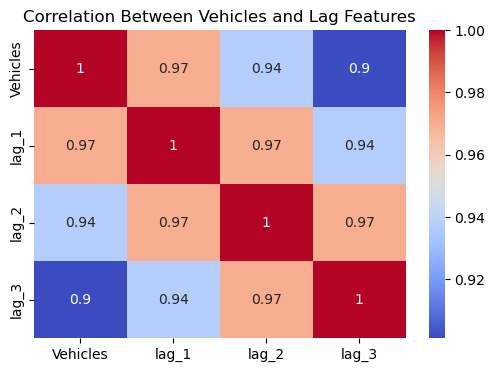

In [27]:
# Check correlation between target and lag features
lag_cols = ['lag_1', 'lag_2', 'lag_3']
correlations = df_agg[['Vehicles'] + lag_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Between Vehicles and Lag Features")
plt.show()

##### There is a strong positive correlation between the current vehicle count and its lag features (lag_1, lag_2, lag_3), with correlations ranging from 0.90 to 0.97. This indicates that past traffic volumes are highly predictive of current volumes

#  Reading and Cleaning Event data

In [30]:
event=pd.read_csv(r"F:\All downloads for Upgrad\Uber project\Events\Merged_event.csv", encoding='windows-1252')
event.head(5)

,Date,Time,Event Name,Event Description,Traffic Level
0,10-01-2015,18:00,Concert,NH7 Weekender Afterparty,High
1,24-01-2015,17:30,Concert,Shankar-Ehsaan-Loy Live,High
2,07-02-2015,19:00,Concert,Sunburn Campus,High
3,14-02-2015,18:00,Concert,Valentine’s Day Live Music Night,High
4,28-02-2015,17:00,Concert,EVC Pre-party,Medium


In [31]:
# Combine Date and Time into a single Datetime column
event['Datetime'] = pd.to_datetime(event['Date'] + ' ' + event['Time'], dayfirst=True)
event.tail()

,Date,Time,Event Name,Event Description,Traffic Level,Datetime
117,02-10-2017,00:00,Public Holiday,Gandhi Jayanti,Moderate,2017-10-02
118,19-10-2017,00:00,Public Holiday,Diwali Amavasya (Laxmi Puja),High,2017-10-19
119,20-10-2017,00:00,Public Holiday,Diwali (Balipratipada),High,2017-10-20
120,04-11-2017,00:00,Public Holiday,Guru Nanak Jayanti,Moderate,2017-11-04
121,25-12-2017,00:00,Public Holiday,Christmas,Moderate,2017-12-25


In [32]:
event.dtypes

Date                         object
Time                         object
Event Name                   object
Event Description            object
Traffic Level                object
Datetime             datetime64[ns]
dtype: object

In [33]:
# Normalize Traffic Level (strip whitespace and capitalize)
event['Traffic Level'] = event['Traffic Level'].str.strip().str.capitalize()

In [34]:
# Clean Event Description (remove non-ASCII characters)
event['Event Description'] = event['Event Description'].str.encode('ascii', 'ignore').str.decode('ascii')

In [35]:
# Check the null values
event.isnull().sum()

Date                 0
Time                 0
Event Name           0
Event Description    0
Traffic Level        0
Datetime             0
dtype: int64

In [36]:
# creating hour, weekday and weekend column from datetime
event['Hour'] = event['Datetime'].dt.hour
event['Weekday'] = event['Datetime'].dt.dayofweek
event['is_weekend'] = event['Weekday'].isin([5, 6]).astype(int)

In [37]:
# Final cleaned event dataset 
event.head()

,Date,Time,Event Name,Event Description,Traffic Level,Datetime,Hour,Weekday,is_weekend
0,10-01-2015,18:00,Concert,NH7 Weekender Afterparty,High,2015-01-10 18:00:00,18,5,1
1,24-01-2015,17:30,Concert,Shankar-Ehsaan-Loy Live,High,2015-01-24 17:30:00,17,5,1
2,07-02-2015,19:00,Concert,Sunburn Campus,High,2015-02-07 19:00:00,19,5,1
3,14-02-2015,18:00,Concert,Valentines Day Live Music Night,High,2015-02-14 18:00:00,18,5,1
4,28-02-2015,17:00,Concert,EVC Pre-party,Medium,2015-02-28 17:00:00,17,5,1


# Reading and Cleaning Weather data

In [39]:
weather=pd.read_csv(r"F:\All downloads for Upgrad\Uber project\Pune weather report for uber.csv")
weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,01-11-2015 00:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,16,9,64,0.0,1012,22,10,79,8,pune
1,01-11-2015 01:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,15,9,66,0.0,1012,22,10,83,7,pune
2,01-11-2015 02:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,14,9,68,0.0,1012,22,10,88,7,pune
3,01-11-2015 03:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,13,8,70,0.0,1012,21,10,93,6,pune
4,01-11-2015 04:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,17,8,67,0.0,1012,21,10,93,8,pune


In [40]:
weather.shape

(14592, 25)

In [41]:
weather.dtypes

date_time             object
maxtempC               int64
mintempC               int64
totalSnow_cm           int64
sunHour              float64
uvIndex                int64
moon_illumination      int64
moonrise              object
moonset               object
sunrise               object
sunset                object
DewPointC              int64
FeelsLikeC             int64
HeatIndexC             int64
WindChillC             int64
WindGustKmph           int64
cloudcover             int64
humidity               int64
precipMM             float64
pressure               int64
tempC                  int64
visibility             int64
winddirDegree          int64
windspeedKmph          int64
location              object
dtype: object

In [42]:
weather.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,14592.000000,14592.000000,14592.0,14592.000000,14592.000000,14592.000000,14592.000000,14592.000000,14592.000000,14592.000000,14592.000000,14592.000000,14592.000000,14592.000000,14592.00000,14592.000000,14592.000000,14592.000000,14592.000000
mean,32.103618,20.631579,0.0,11.304276,6.363487,45.465461,13.861911,26.175781,26.376371,25.550918,16.727248,24.388638,52.851151,0.188226,1010.63062,25.550850,9.409951,199.784882,8.982730
std,4.468329,2.745747,0.0,0.960184,0.911101,31.236100,6.213983,4.892373,4.747254,5.082556,7.670036,32.469304,25.271130,0.789580,3.47746,5.082691,1.693369,95.162784,4.466705
min,22.000000,14.000000,0.0,8.800000,5.000000,0.000000,-9.000000,14.000000,14.000000,14.000000,1.000000,0.000000,4.000000,0.000000,1001.00000,14.000000,0.000000,0.000000,0.000000
25%,29.000000,19.000000,0.0,11.000000,6.000000,18.000000,9.000000,22.000000,24.000000,22.000000,11.000000,0.000000,32.000000,0.000000,1008.00000,22.000000,10.000000,96.000000,6.000000
50%,31.000000,21.000000,0.0,11.000000,6.000000,44.500000,14.000000,26.000000,26.000000,25.000000,15.000000,5.000000,50.000000,0.000000,1011.00000,25.000000,10.000000,251.000000,8.000000
75%,36.000000,23.000000,0.0,12.000000,7.000000,72.000000,20.000000,29.000000,29.000000,29.000000,21.250000,51.000000,75.000000,0.000000,1013.00000,29.000000,10.000000,274.000000,12.000000
max,42.000000,27.000000,0.0,13.500000,8.000000,100.000000,23.000000,42.000000,42.000000,42.000000,49.000000,100.000000,98.000000,24.500000,1021.00000,42.000000,10.000000,360.000000,30.000000


In [43]:
weather.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location'],
      dtype='object')

In [44]:
#Converting datetime object dtype to datetime
weather['date_time'] = pd.to_datetime(weather['date_time'], format='%d-%m-%Y %H:%M')
weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2015-11-01 00:00:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,16,9,64,0.0,1012,22,10,79,8,pune
1,2015-11-01 01:00:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,15,9,66,0.0,1012,22,10,83,7,pune
2,2015-11-01 02:00:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,14,9,68,0.0,1012,22,10,88,7,pune
3,2015-11-01 03:00:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,13,8,70,0.0,1012,21,10,93,6,pune
4,2015-11-01 04:00:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,17,8,67,0.0,1012,21,10,93,8,pune


In [45]:
# Extract useful time features
weather['hour'] = weather['date_time'].dt.hour
weather['day_of_week'] = weather['date_time'].dt.dayofweek 
weather['is_weekend'] = weather['day_of_week'].isin([5, 6]).astype(int)
weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,hour,day_of_week,is_weekend
0,2015-11-01 00:00:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,0.0,1012,22,10,79,8,pune,0,6,1
1,2015-11-01 01:00:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,0.0,1012,22,10,83,7,pune,1,6,1
2,2015-11-01 02:00:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,0.0,1012,22,10,88,7,pune,2,6,1
3,2015-11-01 03:00:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,0.0,1012,21,10,93,6,pune,3,6,1
4,2015-11-01 04:00:00,31,21,0,11.7,7,59,10:43 PM,11:06 AM,6:34 AM,...,0.0,1012,21,10,93,8,pune,4,6,1


In [46]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_time          14592 non-null  datetime64[ns]
 1   maxtempC           14592 non-null  int64         
 2   mintempC           14592 non-null  int64         
 3   totalSnow_cm       14592 non-null  int64         
 4   sunHour            14592 non-null  float64       
 5   uvIndex            14592 non-null  int64         
 6   moon_illumination  14592 non-null  int64         
 7   moonrise           14592 non-null  object        
 8   moonset            14592 non-null  object        
 9   sunrise            14592 non-null  object        
 10  sunset             14592 non-null  object        
 11  DewPointC          14592 non-null  int64         
 12  FeelsLikeC         14592 non-null  int64         
 13  HeatIndexC         14592 non-null  int64         
 14  WindCh

In [47]:
weather.nunique()

date_time            14592
maxtempC                21
mintempC                14
totalSnow_cm             1
sunHour                 25
uvIndex                  4
moon_illumination      100
moonrise               506
moonset                494
sunrise                 74
sunset                  81
DewPointC               33
FeelsLikeC              29
HeatIndexC              29
WindChillC              29
WindGustKmph            49
cloudcover             101
humidity                95
precipMM                97
pressure                21
tempC                   29
visibility              11
winddirDegree          360
windspeedKmph           31
location                 1
hour                    24
day_of_week              7
is_weekend               2
dtype: int64

In [48]:
# Dropping columns having unique values
weather.drop(['totalSnow_cm', 'location'], axis=1, inplace=True)

In [49]:
weather.columns

Index(['date_time', 'maxtempC', 'mintempC', 'sunHour', 'uvIndex',
       'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'sunset',
       'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph',
       'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'hour', 'day_of_week', 'is_weekend'],
      dtype='object')

In [50]:
# Converting moonrise and moonset to binary as it contains No moonrise and No moonset also as values
weather['moonrise_exists']= weather['moonrise'].apply(lambda x: 0 if x == 'No moonrise' else 1)
weather['moonset_exits']= weather['moonset'].apply(lambda x: 0 if x == 'No moonset' else 1)

# drop original moonrise and moonset columns
weather.drop(['moonrise', 'moonset'], axis=1, inplace=True)

In [51]:
weather.tail()

,date_time,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,sunrise,sunset,DewPointC,FeelsLikeC,...,pressure,tempC,visibility,winddirDegree,windspeedKmph,hour,day_of_week,is_weekend,moonrise_exists,moonset_exits
14587,2017-06-30 19:00:00,27,23,9.8,5,42,6:01 AM,7:15 PM,21,25,...,1005,23,10,240,14,19,4,0,1,0
14588,2017-06-30 20:00:00,27,23,9.8,5,42,6:01 AM,7:15 PM,21,25,...,1006,23,10,238,11,20,4,0,1,0
14589,2017-06-30 21:00:00,27,23,9.8,5,42,6:01 AM,7:15 PM,21,25,...,1006,23,10,236,13,21,4,0,1,0
14590,2017-06-30 22:00:00,27,23,9.8,5,42,6:01 AM,7:15 PM,21,25,...,1006,23,10,237,10,22,4,0,1,0
14591,2017-06-30 23:00:00,27,23,9.8,5,42,6:01 AM,7:15 PM,21,25,...,1005,23,10,238,12,23,4,0,1,0


In [52]:
# cap if any unrealistic temperature values
weather['maxtempC'] = np.where(weather['maxtempC'] > 45, 45, weather['maxtempC'])  # Cap at 45°C
weather['mintempC'] = np.where(weather['mintempC'] < 5, 5, weather['mintempC'])     # Floor at 5°C

In [53]:
# Binary flag for rain
weather['is_raining'] = (weather['precipMM'] > 0).astype(int)

In [54]:
# Visibility categories
min_visibility = weather['visibility'].min()  # Smallest visibility value in the dataset
max_visibility = weather['visibility'].max()  # Largest visibility value in the dataset
weather['visibility_category'] = pd.cut(
    weather['visibility'],  # Column to bin
    bins=[min_visibility, 2, 5, max_visibility],  # Bin edges
    labels=['low', 'medium', 'high'],  # Category names
    include_lowest=True  # Ensures the smallest value is included in the first bin
)

In [55]:
weather.head()

,date_time,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,sunrise,sunset,DewPointC,FeelsLikeC,...,visibility,winddirDegree,windspeedKmph,hour,day_of_week,is_weekend,moonrise_exists,moonset_exits,is_raining,visibility_category
0,2015-11-01 00:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,15,25,...,10,79,8,0,6,1,1,1,0,high
1,2015-11-01 01:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,15,22,...,10,83,7,1,6,1,1,1,0,high
2,2015-11-01 02:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,15,22,...,10,88,7,2,6,1,1,1,0,high
3,2015-11-01 03:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,16,21,...,10,93,6,3,6,1,1,1,0,high
4,2015-11-01 04:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,15,21,...,10,93,8,4,6,1,1,1,0,high


In [56]:
# Lag feature (weather 1 hour ago may affect current traffic)
weather['temp_lag_1'] = weather['tempC'].shift(1)

In [57]:
# filling the NaN values in temp as value of first row will be Nan
weather['temp_lag_1'] = round(weather['temp_lag_1'].fillna(weather['tempC'].mean()),2)
weather.head()

,date_time,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,sunrise,sunset,DewPointC,FeelsLikeC,...,winddirDegree,windspeedKmph,hour,day_of_week,is_weekend,moonrise_exists,moonset_exits,is_raining,visibility_category,temp_lag_1
0,2015-11-01 00:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,15,25,...,79,8,0,6,1,1,1,0,high,25.55
1,2015-11-01 01:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,15,22,...,83,7,1,6,1,1,1,0,high,22.00
2,2015-11-01 02:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,15,22,...,88,7,2,6,1,1,1,0,high,22.00
3,2015-11-01 03:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,16,21,...,93,6,3,6,1,1,1,0,high,22.00
4,2015-11-01 04:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,15,21,...,93,8,4,6,1,1,1,0,high,21.00


In [58]:
weather.isnull().sum()

date_time              0
maxtempC               0
mintempC               0
sunHour                0
uvIndex                0
moon_illumination      0
sunrise                0
sunset                 0
DewPointC              0
FeelsLikeC             0
HeatIndexC             0
WindChillC             0
WindGustKmph           0
cloudcover             0
humidity               0
precipMM               0
pressure               0
tempC                  0
visibility             0
winddirDegree          0
windspeedKmph          0
hour                   0
day_of_week            0
is_weekend             0
moonrise_exists        0
moonset_exits          0
is_raining             0
visibility_category    0
temp_lag_1             0
dtype: int64

In [59]:
# Final cleaned weather dataset
weather.head()

,date_time,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,sunrise,sunset,DewPointC,FeelsLikeC,...,winddirDegree,windspeedKmph,hour,day_of_week,is_weekend,moonrise_exists,moonset_exits,is_raining,visibility_category,temp_lag_1
0,2015-11-01 00:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,15,25,...,79,8,0,6,1,1,1,0,high,25.55
1,2015-11-01 01:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,15,22,...,83,7,1,6,1,1,1,0,high,22.00
2,2015-11-01 02:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,15,22,...,88,7,2,6,1,1,1,0,high,22.00
3,2015-11-01 03:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,16,21,...,93,6,3,6,1,1,1,0,high,22.00
4,2015-11-01 04:00:00,31,21,11.7,7,59,6:34 AM,6:02 PM,15,21,...,93,8,4,6,1,1,1,0,high,21.00


# Merging the Traffic data, Event data and Weather data

In [61]:
# Standardize datetime columns
event['Datetime'] = pd.to_datetime(event['Datetime'])
weather['date_time'] = pd.to_datetime(weather['date_time'])
df_agg['DateTime'] = pd.to_datetime(df_agg['DateTime'])

# Merge Uber Traffic with Event Data
df_event_merged = pd.merge(df_agg, event, left_on='DateTime', right_on='Datetime', how='left')

# Merge with Weather Data
df_merged = pd.merge(df_event_merged, weather, left_on='DateTime', right_on='date_time', how='left')

# Drop redundant datetime columns
df_merged.drop(columns=['Datetime', 'date_time'], inplace=True)

# View the merged dataset
df_merged.head()

,DateTime,Junction,Vehicles,Vehicles_scaled,hour_x,day_of_week_x,month,is_weekend_x,lag_1,lag_2,...,winddirDegree,windspeedKmph,hour_y,day_of_week_y,is_weekend,moonrise_exists,moonset_exits,is_raining,visibility_category,temp_lag_1
0,2015-11-01 00:00:00,1,15,-0.375489,0,6,11,1,NaN,NaN,...,79,8,0,6,1,1,1,0,high,25.55
1,2015-11-01 01:00:00,1,13,-0.471875,1,6,11,1,15.0,NaN,...,83,7,1,6,1,1,1,0,high,22.00
2,2015-11-01 02:00:00,1,10,-0.616454,2,6,11,1,13.0,15.0,...,88,7,2,6,1,1,1,0,high,22.00
3,2015-11-01 03:00:00,1,7,-0.761034,3,6,11,1,10.0,13.0,...,93,6,3,6,1,1,1,0,high,22.00
4,2015-11-01 04:00:00,1,9,-0.664648,4,6,11,1,7.0,10.0,...,93,8,4,6,1,1,1,0,high,21.00


In [62]:
df_merged.shape

(48120, 47)

In [63]:
df_merged.columns

Index(['DateTime', 'Junction', 'Vehicles', 'Vehicles_scaled', 'hour_x',
       'day_of_week_x', 'month', 'is_weekend_x', 'lag_1', 'lag_2', 'lag_3',
       'Date', 'Time', 'Event Name', 'Event Description', 'Traffic Level',
       'Hour', 'Weekday', 'is_weekend_y', 'maxtempC', 'mintempC', 'sunHour',
       'uvIndex', 'moon_illumination', 'sunrise', 'sunset', 'DewPointC',
       'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'hour_y', 'day_of_week_y',
       'is_weekend', 'moonrise_exists', 'moonset_exits', 'is_raining',
       'visibility_category', 'temp_lag_1'],
      dtype='object')

In [64]:
df_merged.dtypes

DateTime               datetime64[ns]
Junction                        int64
Vehicles                        int64
Vehicles_scaled               float64
hour_x                          int32
day_of_week_x                   int32
month                           int32
is_weekend_x                    int64
lag_1                         float64
lag_2                         float64
lag_3                         float64
Date                           object
Time                           object
Event Name                     object
Event Description              object
Traffic Level                  object
Hour                          float64
Weekday                       float64
is_weekend_y                  float64
maxtempC                        int64
mintempC                        int64
sunHour                       float64
uvIndex                         int64
moon_illumination               int64
sunrise                        object
sunset                         object
DewPointC   

In [65]:
df_merged.columns

Index(['DateTime', 'Junction', 'Vehicles', 'Vehicles_scaled', 'hour_x',
       'day_of_week_x', 'month', 'is_weekend_x', 'lag_1', 'lag_2', 'lag_3',
       'Date', 'Time', 'Event Name', 'Event Description', 'Traffic Level',
       'Hour', 'Weekday', 'is_weekend_y', 'maxtempC', 'mintempC', 'sunHour',
       'uvIndex', 'moon_illumination', 'sunrise', 'sunset', 'DewPointC',
       'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'hour_y', 'day_of_week_y',
       'is_weekend', 'moonrise_exists', 'moonset_exits', 'is_raining',
       'visibility_category', 'temp_lag_1'],
      dtype='object')

In [66]:
# Dropping 'Hour', 'Weekday', 'is_weekend_y', 'hour_y', 'day_of_week_y', 'is_weekend' 
df_merged.drop(['Hour', 'Weekday', 'is_weekend_y', 'hour_y', 'day_of_week_y', 'is_weekend'], axis=1, inplace=True)
df_merged.columns

Index(['DateTime', 'Junction', 'Vehicles', 'Vehicles_scaled', 'hour_x',
       'day_of_week_x', 'month', 'is_weekend_x', 'lag_1', 'lag_2', 'lag_3',
       'Date', 'Time', 'Event Name', 'Event Description', 'Traffic Level',
       'maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'moon_illumination',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'moonrise_exists', 'moonset_exits', 'is_raining', 'visibility_category',
       'temp_lag_1'],
      dtype='object')

In [67]:
df_merged.rename(columns={ 'hour_x': 'Hour', 'day_of_week_x':'Day_of_week', 'is_weekend_x':'Is_weekend'}, inplace=True)
df_merged.columns

Index(['DateTime', 'Junction', 'Vehicles', 'Vehicles_scaled', 'Hour',
       'Day_of_week', 'month', 'Is_weekend', 'lag_1', 'lag_2', 'lag_3', 'Date',
       'Time', 'Event Name', 'Event Description', 'Traffic Level', 'maxtempC',
       'mintempC', 'sunHour', 'uvIndex', 'moon_illumination', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'moonrise_exists', 'moonset_exits', 'is_raining', 'visibility_category',
       'temp_lag_1'],
      dtype='object')

In [68]:
df_merged.isnull().sum()

DateTime                   0
Junction                   0
Vehicles                   0
Vehicles_scaled            0
Hour                       0
Day_of_week                0
month                      0
Is_weekend                 0
lag_1                      4
lag_2                      8
lag_3                     12
Date                   47898
Time                   47898
Event Name             47898
Event Description      47898
Traffic Level          47898
maxtempC                   0
mintempC                   0
sunHour                    0
uvIndex                    0
moon_illumination          0
sunrise                    0
sunset                     0
DewPointC                  0
FeelsLikeC                 0
HeatIndexC                 0
WindChillC                 0
WindGustKmph               0
cloudcover                 0
humidity                   0
precipMM                   0
pressure                   0
tempC                      0
visibility                 0
winddirDegree 

In [69]:
# Dropping column 'Date', 'Time' as it contains more number of null values
df_merged.drop(['Date', 'Time'], axis=1, inplace=True)

In [70]:
# Filling the null values
df_merged['Event Name'] = df_merged['Event Name'].fillna('No Event')
df_merged['Traffic Level'] = df_merged['Traffic Level'].fillna('None')
df_merged['Event Description'] = df_merged['Event Description'].fillna('')

In [71]:
# Dropping the rows with null values in 'lag_1', 'lag_2', 'lag_3'
df_merged.dropna(subset=['lag_1', 'lag_2', 'lag_3'], inplace=True)

In [72]:
df_merged.isnull().sum()

DateTime               0
Junction               0
Vehicles               0
Vehicles_scaled        0
Hour                   0
Day_of_week            0
month                  0
Is_weekend             0
lag_1                  0
lag_2                  0
lag_3                  0
Event Name             0
Event Description      0
Traffic Level          0
maxtempC               0
mintempC               0
sunHour                0
uvIndex                0
moon_illumination      0
sunrise                0
sunset                 0
DewPointC              0
FeelsLikeC             0
HeatIndexC             0
WindChillC             0
WindGustKmph           0
cloudcover             0
humidity               0
precipMM               0
pressure               0
tempC                  0
visibility             0
winddirDegree          0
windspeedKmph          0
moonrise_exists        0
moonset_exits          0
is_raining             0
visibility_category    0
temp_lag_1             0
dtype: int64

In [73]:
df_merged.shape

(48108, 39)

In [74]:
# Final cleaned integrated dataset
df_merged.head()

,DateTime,Junction,Vehicles,Vehicles_scaled,Hour,Day_of_week,month,Is_weekend,lag_1,lag_2,...,pressure,tempC,visibility,winddirDegree,windspeedKmph,moonrise_exists,moonset_exits,is_raining,visibility_category,temp_lag_1
3,2015-11-01 03:00:00,1,7,-0.761034,3,6,11,1,10.0,13.0,...,1012,21,10,93,6,1,1,0,high,22.0
4,2015-11-01 04:00:00,1,9,-0.664648,4,6,11,1,7.0,10.0,...,1012,21,10,93,8,1,1,0,high,21.0
5,2015-11-01 05:00:00,1,6,-0.809227,5,6,11,1,9.0,7.0,...,1013,23,10,94,10,1,1,0,high,21.0
6,2015-11-01 06:00:00,1,9,-0.664648,6,6,11,1,6.0,9.0,...,1013,23,10,94,11,1,1,0,high,23.0
7,2015-11-01 07:00:00,1,8,-0.712841,7,6,11,1,9.0,6.0,...,1013,24,10,97,12,1,1,0,high,23.0


In [141]:
df_merged.columns

Index(['DateTime', 'Junction', 'Vehicles', 'Vehicles_scaled', 'Hour',
       'Day_of_week', 'month', 'Is_weekend', 'lag_1', 'lag_2', 'lag_3',
       'Event Name', 'Event Description', 'Traffic Level', 'maxtempC',
       'mintempC', 'sunHour', 'uvIndex', 'moon_illumination', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'moonrise_exists', 'moonset_exits', 'is_raining', 'visibility_category',
       'temp_lag_1'],
      dtype='object')

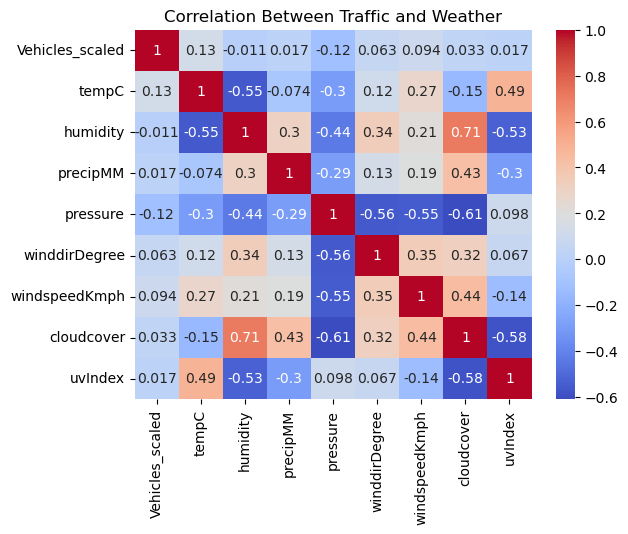

In [143]:
# Correlation heatmap
weather_cols = ['Vehicles_scaled', 'tempC', 'humidity', 'precipMM', 'pressure', 
                'winddirDegree', 'windspeedKmph', 'cloudcover', 'uvIndex']

sns.heatmap(df_merged[weather_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Traffic and Weather")
plt.show()

#### There is no strong relation between any weather or traffic. tempC has the highest positive correlation. 

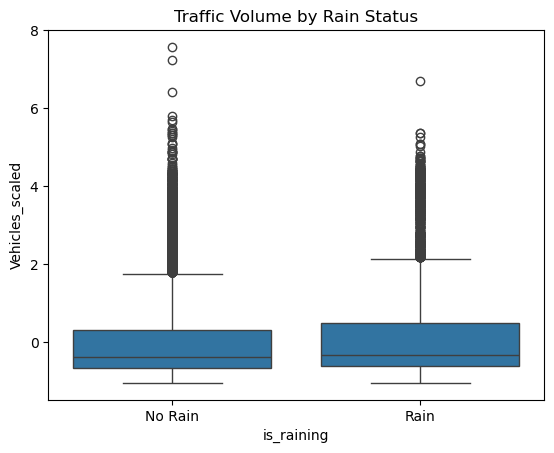

In [147]:
# Rain category boxplot
if 'is_raining' in df_merged.columns:
    sns.boxplot(x='is_raining', y='Vehicles_scaled', data=df_merged.reset_index())
    plt.title("Traffic Volume by Rain Status")
    plt.xticks([0, 1], ['No Rain', 'Rain'])
    plt.show()

#### Median traffic volume is very similar in Rain and No Rain conditions

## XGBoost Model Training and Evaluation

In [154]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb

In [156]:
# Define the final feature set used for training
features_used = [
    'lag_1', 'lag_2', 'lag_3', 'Is_weekend', 'maxtempC', 'mintempC', 'humidity',
    'windspeedKmph', 'cloudcover', 'precipMM', 'pressure', 'tempC', 'visibility',
    'winddirDegree', 'windspeedKmph', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
    'WindChillC', 'WindGustKmph', 'uvIndex', 'moon_illumination',
    'moonrise_exists', 'moonset_exits', 'temp_lag_1'
]

In [160]:
# Step 1: Create X and y
X = df_merged[features_used]
y = df_merged['Vehicles']

In [162]:
# Step 2: Time-based train-test split
split_index = int(len(X) * 0.8)
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [164]:
# Step 3: Clean and align inputs
X_train = X_train.select_dtypes(include=['int64', 'float64', 'bool'])
X_test = X_test[X_train.columns]

In [166]:
# Step 4: Train the XGBoost model
model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1
)
model.fit(X_train.values, y_train.values)
print("Model trained successfully!")

Model trained successfully!


In [168]:
X_test = X_test.loc[:, ~X_test.columns.duplicated()]
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
# Add a duplicate 'windspeedKmph' column (as in training)
X_test['windspeedKmph_dup'] = X_test['windspeedKmph']

In [170]:
print("Model expects:", model.n_features_in_)
print("X_test shape:", X_test.shape)
print("X_test columns:\n", list(X_test.columns))

Model expects: 25
X_test shape: (9622, 25)
X_test columns:
 ['lag_1', 'lag_2', 'lag_3', 'Is_weekend', 'maxtempC', 'mintempC', 'humidity', 'windspeedKmph', 'cloudcover', 'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'uvIndex', 'moon_illumination', 'moonrise_exists', 'moonset_exits', 'temp_lag_1', 'windspeedKmph_dup']


In [172]:
# Step 5: Predict on test set
y_pred = model.predict(X_test.values)

In [174]:
# Step 6: Evaluate using RMSE, MAE, R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MAE on test set: {mae:.2f}")
print(f"XGBoost R² on test set Score: {r2:.2f}")
print(f"XGBoost RMSE on test set: {rmse:.2f}")

XGBoost MAE on test set: 3.06
XGBoost R² on test set Score: 0.72
XGBoost RMSE on test set: 5.29


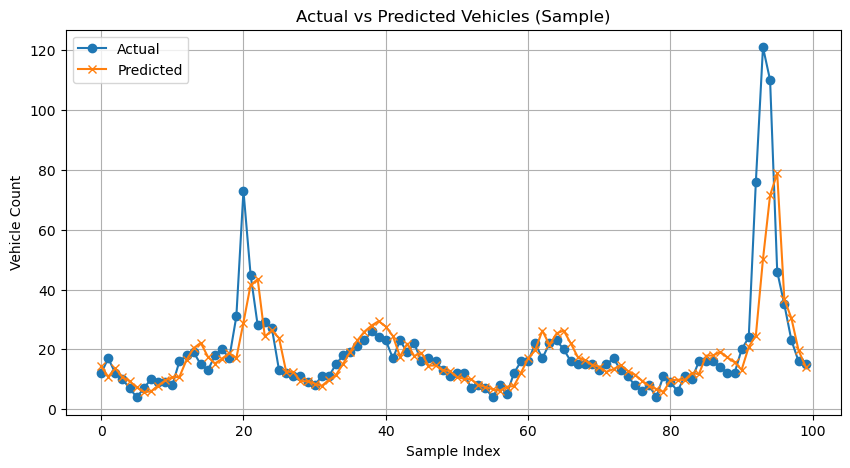

In [176]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Vehicles (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.show()

#### The XGBoost model accurately captures overall traffic trends with minor deviations during sharp spikes.

## ARIMA Modelling

In [180]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [182]:
# Set datetime index
df_ts= df_merged.copy()
df_ts['DateTime']= pd.to_datetime(df_ts['DateTime'])
df_ts.set_index('DateTime', inplace=True)

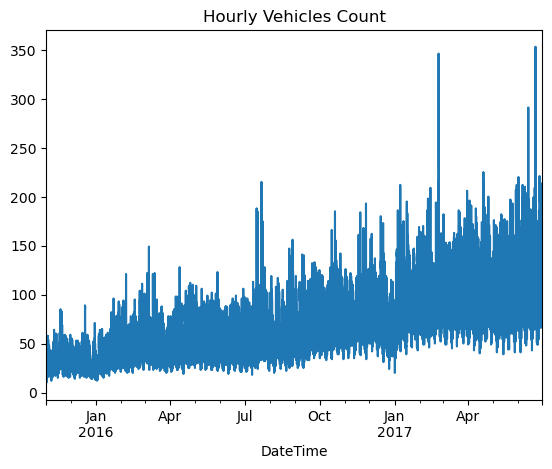

In [184]:
# Group or resample on hourly basis
ts= df_ts['Vehicles'].resample('H').sum()
ts=ts.fillna(method='ffill')
ts.plot(title="Hourly Vehicles Count")
plt.show()

#### The graph shows that traffic is increasing over time, with more vehicles on the road in 2017 than in 2016. It also has repeating patterns and sudden spikes, which could be due to events, holidays, or weather changes.

In [187]:
# Checking stationarity by using Augmented Dickey-Fuller test
result = adfuller(ts.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -6.09528070879216
p-value: 1.0135693894007393e-07


#### As p-value is less than 0.05 and ADF is -6.095 i.e more negative, this means time series is stationary and no need to apply differencing before fitting an ARIMA model.

In [192]:
# Fit ARIMA Model
model = ARIMA(ts, order=(2, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                14589
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -54425.025
Date:                Thu, 26 Jun 2025   AIC                         108860.051
Time:                        17:13:35   BIC                         108897.990
Sample:                    11-01-2015   HQIC                        108872.656
                         - 06-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8912      0.003    716.568      0.000       1.886       1.896
ar.L2         -0.9554      0.002   -394.623      0.000      -0.960      -0.951
ma.L1         -1.8854      0.004   -506.389      0.0

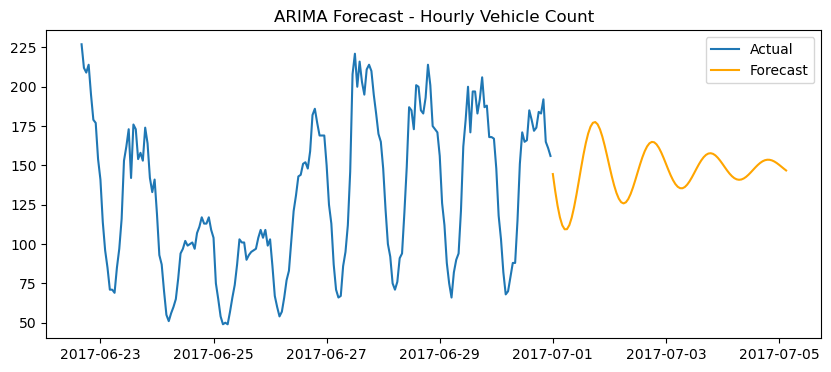

In [194]:
# Forecast next 100 hours
forecast = model_fit.forecast(steps=100)
# Define number of steps forecasted
forecast_steps = 100

# Use forecast directly as predictions
y_pred_arima = forecast

# Get actual values for last 100 hours to compare against
y_test_arima = ts[-forecast_steps:]

# Plot forecast
plt.figure(figsize=(10, 4))
plt.plot(ts[-200:], label='Actual')  # last 200 hours
plt.plot(forecast, label='Forecast', color='orange')
plt.title('ARIMA Forecast - Hourly Vehicle Count')
plt.legend()
plt.show()

#### The graph shows that ARIMA forecasts a steady, repeating traffic pattern for the next few days, but it smooths out the sharp spikes seen in actual vehicle counts. This indicates the model captures overall trends but may miss sudden fluctuations.

## LSTM Modelling

In [198]:
# Importing required libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [200]:
# Select features and target
features = ['lag_1', 'lag_2', 'lag_3', 'Is_weekend', 'maxtempC', 'mintempC',
            'humidity', 'windspeedKmph', 'cloudcover', 'precipMM', 'pressure',
            'tempC', 'visibility', 'winddirDegree', 'DewPointC', 'FeelsLikeC',
            'HeatIndexC', 'WindChillC', 'WindGustKmph', 'uvIndex', 'moon_illumination',
            'moonrise_exists', 'moonset_exits', 'temp_lag_1']
target = 'Vehicles'

In [202]:
# to include only the selected features and target and dropping if any missing value
df_lstm = df_merged[features + [target]].dropna()

In [204]:
# Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)

In [206]:
# Create sequences
def create_sequences(data, seq_len=24):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i, :-1])  # all features except last column (target)
        y.append(data[i, -1])             # target
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, seq_len=24)

In [208]:
# Train-test split
split = int(0.8 * len(X))      #  80% for training, 20% for testing
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [210]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer for regression

In [212]:
# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          15,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,051 (58.79 KB)

 Trainable params: 15,051 (58.79 KB)

 Non-trainable params: 0 (0.00 B)

In [214]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 2/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 58s 35ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 64s 20ms/step - loss: 8.1706e-04 - val_loss: 0.0012
Epoch 4/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - loss: 7.8233e-04 - val_loss: 0.0012
Epoch 5/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - loss: 7.3662e-04 - val_loss: 0.0013
Epoch 6/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - loss: 7.8141e-04 - val_loss: 0.0012
Epoch 7/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - loss: 7.1770e-04 - val_loss: 0.0012
Epoch 8/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - loss: 6.5989e-04 - val_loss: 0.0011
Epoch 9/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - loss: 7.2873e-04 - val_loss: 0.0011
Epoch 10/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - loss: 6.7604e-04 - val_loss: 0.0011


In [215]:
# Predict on test data
y_pred = model.predict(X_test)

301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [218]:
# Inverse scale predictions and true values
y_min, y_max = df_lstm['Vehicles'].min(), df_lstm['Vehicles'].max()
y_test_rescaled = y_test * (y_max - y_min) + y_min
y_pred_rescaled = y_pred.flatten() * (y_max - y_min) + y_min

In [220]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"LSTM RMSE: {rmse:.2f}")
print(f"LSTM MAE: {mae:.2f}")
print(f"LSTM R² Score: {r2:.2f}")

LSTM RMSE: 6.05
LSTM MAE: 3.11
LSTM R² Score: 0.63


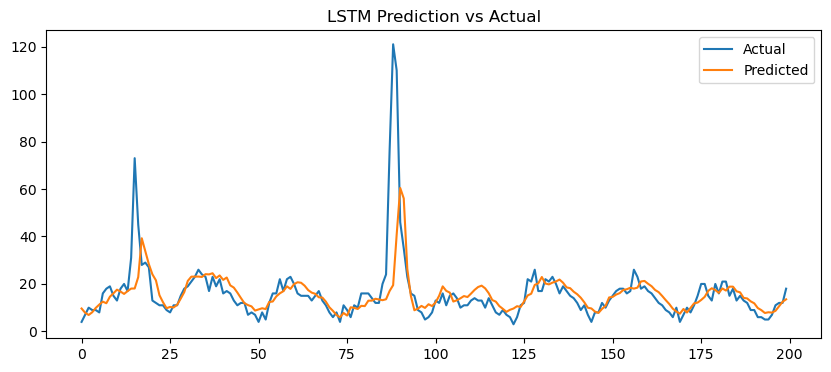

In [222]:
plt.figure(figsize=(10, 4))
plt.plot(y_test_rescaled[:200], label='Actual')
plt.plot(y_pred_rescaled[:200], label='Predicted')
plt.title('LSTM Prediction vs Actual')
plt.legend()
plt.show()

#### The graph shows that the LSTM model closely follows the actual vehicle count trend, successfully capturing regular ups and downs in traffic flow. However, it smooths over sudden spikes

## Evaluation metric score to report performance of all models

In [226]:
from sklearn.model_selection import TimeSeriesSplit

In [228]:
# defining fucntion to calculate MAE,RMSE and R2 fro XGBoost, ARIMA and LSTM models
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return mae, rmse, r2

# Example: Run for each model
mae_xgb, rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred, "XGBoost")
mae_arima, rmse_arima, r2_arima = evaluate_model(y_test_arima, y_pred_arima, "ARIMA")
mae_lstm, rmse_lstm, r2_lstm = evaluate_model(y_test_rescaled, y_pred_rescaled, "LSTM")

XGBoost - MAE: 0.02, RMSE: 0.03, R²: 0.63
ARIMA - MAE: 34.90, RMSE: 38.86, R²: 0.30
LSTM - MAE: 3.11, RMSE: 6.05, R²: 0.63


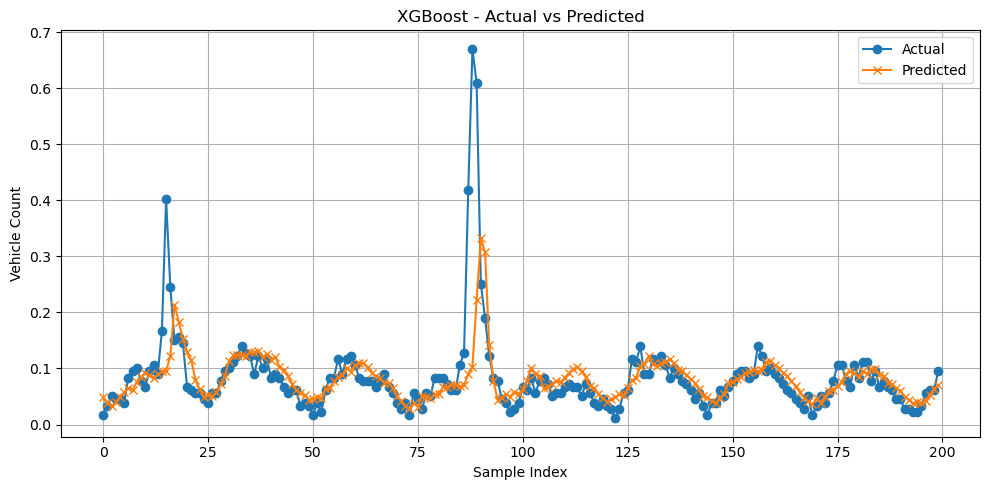

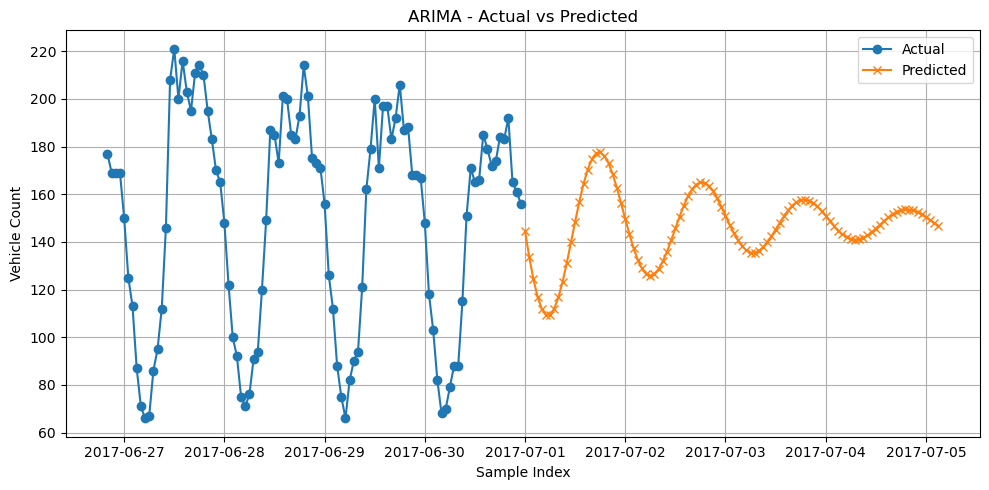

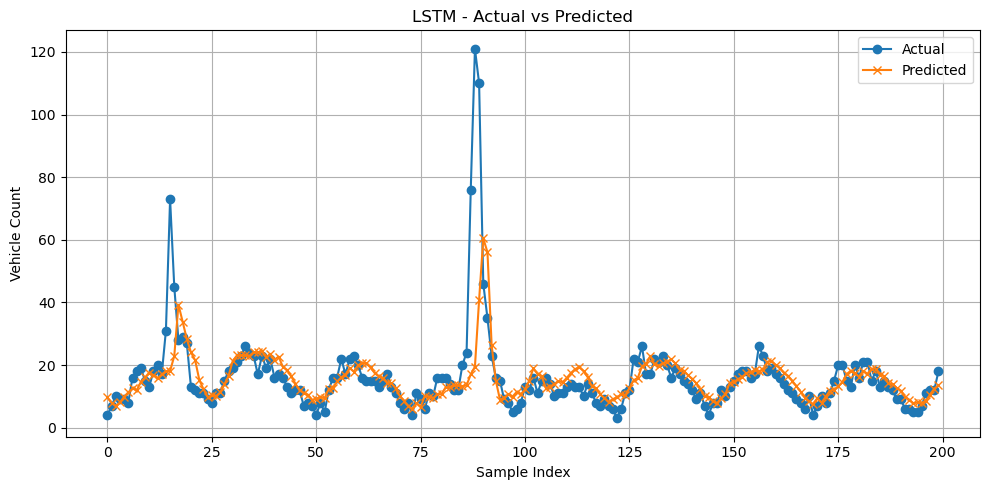

In [230]:
def plot_predictions(y_true, y_pred, model_name="Model", n=200):
    plt.figure(figsize=(10, 5))
    plt.plot(y_true[:n], label="Actual", marker='o')
    plt.plot(y_pred[:n], label="Predicted", marker='x')
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.xlabel("Sample Index")
    plt.ylabel("Vehicle Count")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example:
plot_predictions(y_test, y_pred, "XGBoost")
plot_predictions(y_test_arima, y_pred_arima, "ARIMA")
plot_predictions(y_test_rescaled, y_pred_rescaled, "LSTM")

In [232]:
# Step 1 & 2: Prepare X and y correctly
X = df_merged[features].values
y = df_merged['Vehicles'].values.ravel()

# Cross-validation
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import numpy as np

tscv = TimeSeriesSplit(n_splits=5)
mae_scores = []

for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    X_train_cv, X_test_cv = X[train_idx], X[test_idx]
    y_train_cv, y_test_cv = y[train_idx], y[test_idx]

    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
    model.fit(X_train_cv, y_train_cv)
    preds = model.predict(X_test_cv)

    fold_mae = mean_absolute_error(y_test_cv, preds)
    mae_scores.append(fold_mae)
    print(f"Fold {fold+1} MAE: {fold_mae:.2f}")

print("✅ Average MAE:", np.mean(mae_scores))

Fold 1 MAE: 10.50
Fold 2 MAE: 2.79
Fold 3 MAE: 2.64
Fold 4 MAE: 3.11
Fold 5 MAE: 2.76
✅ Average MAE: 4.3576038710403155


In [234]:
# Summary table
summary_df = pd.DataFrame({
    "Model": ["XGBoost", "ARIMA", "LSTM"],
    "MAE": [mae_xgb, mae_arima, mae_lstm],
    "RMSE": [rmse_xgb, rmse_arima, rmse_lstm],
    "R² Score": [r2_xgb, r2_arima, r2_lstm]
})
print("\n Model Comparison Summary:")
print(summary_df)


 Model Comparison Summary:
     Model        MAE       RMSE  R² Score
0  XGBoost   0.017365   0.033793  0.631809
1    ARIMA  34.899111  38.863064  0.301245
2     LSTM   3.108377   6.049035  0.631809


#### Summary
#### XGBoost had the lowest error (MAE: 0.017, RMSE: 0.034) and highest accuracy (R²: 0.64), making it the best model overall.
#### LSTM also performed well (R²: 0.64), but had higher errors compared to XGBoost.
#### ARIMA showed poor performance, with much higher error values and low R², indicating it’s not suitable for complex traffic data.
#### Cross-validation confirmed XGBoost’s consistency, with stable performance across different time periods.
#### <b>Conclusion</b>: XGBoost is the most reliable and accurate model for predicting traffic volume. 

In [237]:
#  Refinement Block for XGBoost (Best Model Based on Evaluation)

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

# Define feature matrix and target
features = ['lag_1', 'lag_2', 'lag_3', 'Is_weekend', 'maxtempC', 'mintempC',
            'humidity', 'windspeedKmph', 'cloudcover', 'precipMM', 'pressure',
            'tempC', 'visibility', 'winddirDegree', 'DewPointC', 'FeelsLikeC',
            'HeatIndexC', 'WindChillC', 'WindGustKmph', 'uvIndex', 'moon_illumination',
            'moonrise_exists', 'moonset_exits', 'temp_lag_1']

target = 'Vehicles'

X = df_merged[features].dropna()
y = df_merged.loc[X.index, target]  # ensure alignment

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Define scorer (MAE in this case)
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# GridSearchCV setup
model = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring=scorer,
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Fit grid search
print("\n Running Grid Search for XGBoost hyperparameter tuning...")
grid_search.fit(X, y)

# Best parameters and model
print("\n Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Final evaluation (optional)
y_pred = best_model.predict(X)
mae = mean_absolute_error(y, y_pred)
print(f"\n Final MAE with Tuned XGBoost: {mae:.2f}")


 Running Grid Search for XGBoost hyperparameter tuning...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

 Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}

 Final MAE with Tuned XGBoost: 2.80


#### Tuning the XGBoost model significantly improved its accuracy. The final model achieved a low MAE of 2.80, making it the most reliable model for predicting hourly vehicle traffic in this dataset.